### Import Packages and Mount drive

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, RocCurveDisplay, roc_curve, auc

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Natural Gas price data

In [3]:
data = pd.read_csv('drive/My Drive/Colab Notebooks/Loan_Data.csv')

In [4]:
data.dtypes

customer_id                   int64
credit_lines_outstanding      int64
loan_amt_outstanding        float64
total_debt_outstanding      float64
income                      float64
years_employed                int64
fico_score                    int64
default                       int64
dtype: object

## Data cleaning & transformation

In [5]:
data

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545,3915.471,78039.385,5,605,0
1,7442532,5,1958.929,8228.753,26648.435,2,572,1
2,2256073,0,3363.009,2027.831,65866.712,4,602,0
3,4885975,0,4766.648,2501.730,74356.883,5,612,0
4,4700614,1,1345.828,1768.826,23448.326,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647,2553.733,42691.628,5,697,0
9996,6184073,1,4146.239,5458.164,79969.505,8,615,0
9997,6694516,2,3088.224,4813.091,38192.676,5,596,0
9998,3942961,0,3288.902,1043.100,50929.372,2,647,0


## EDA

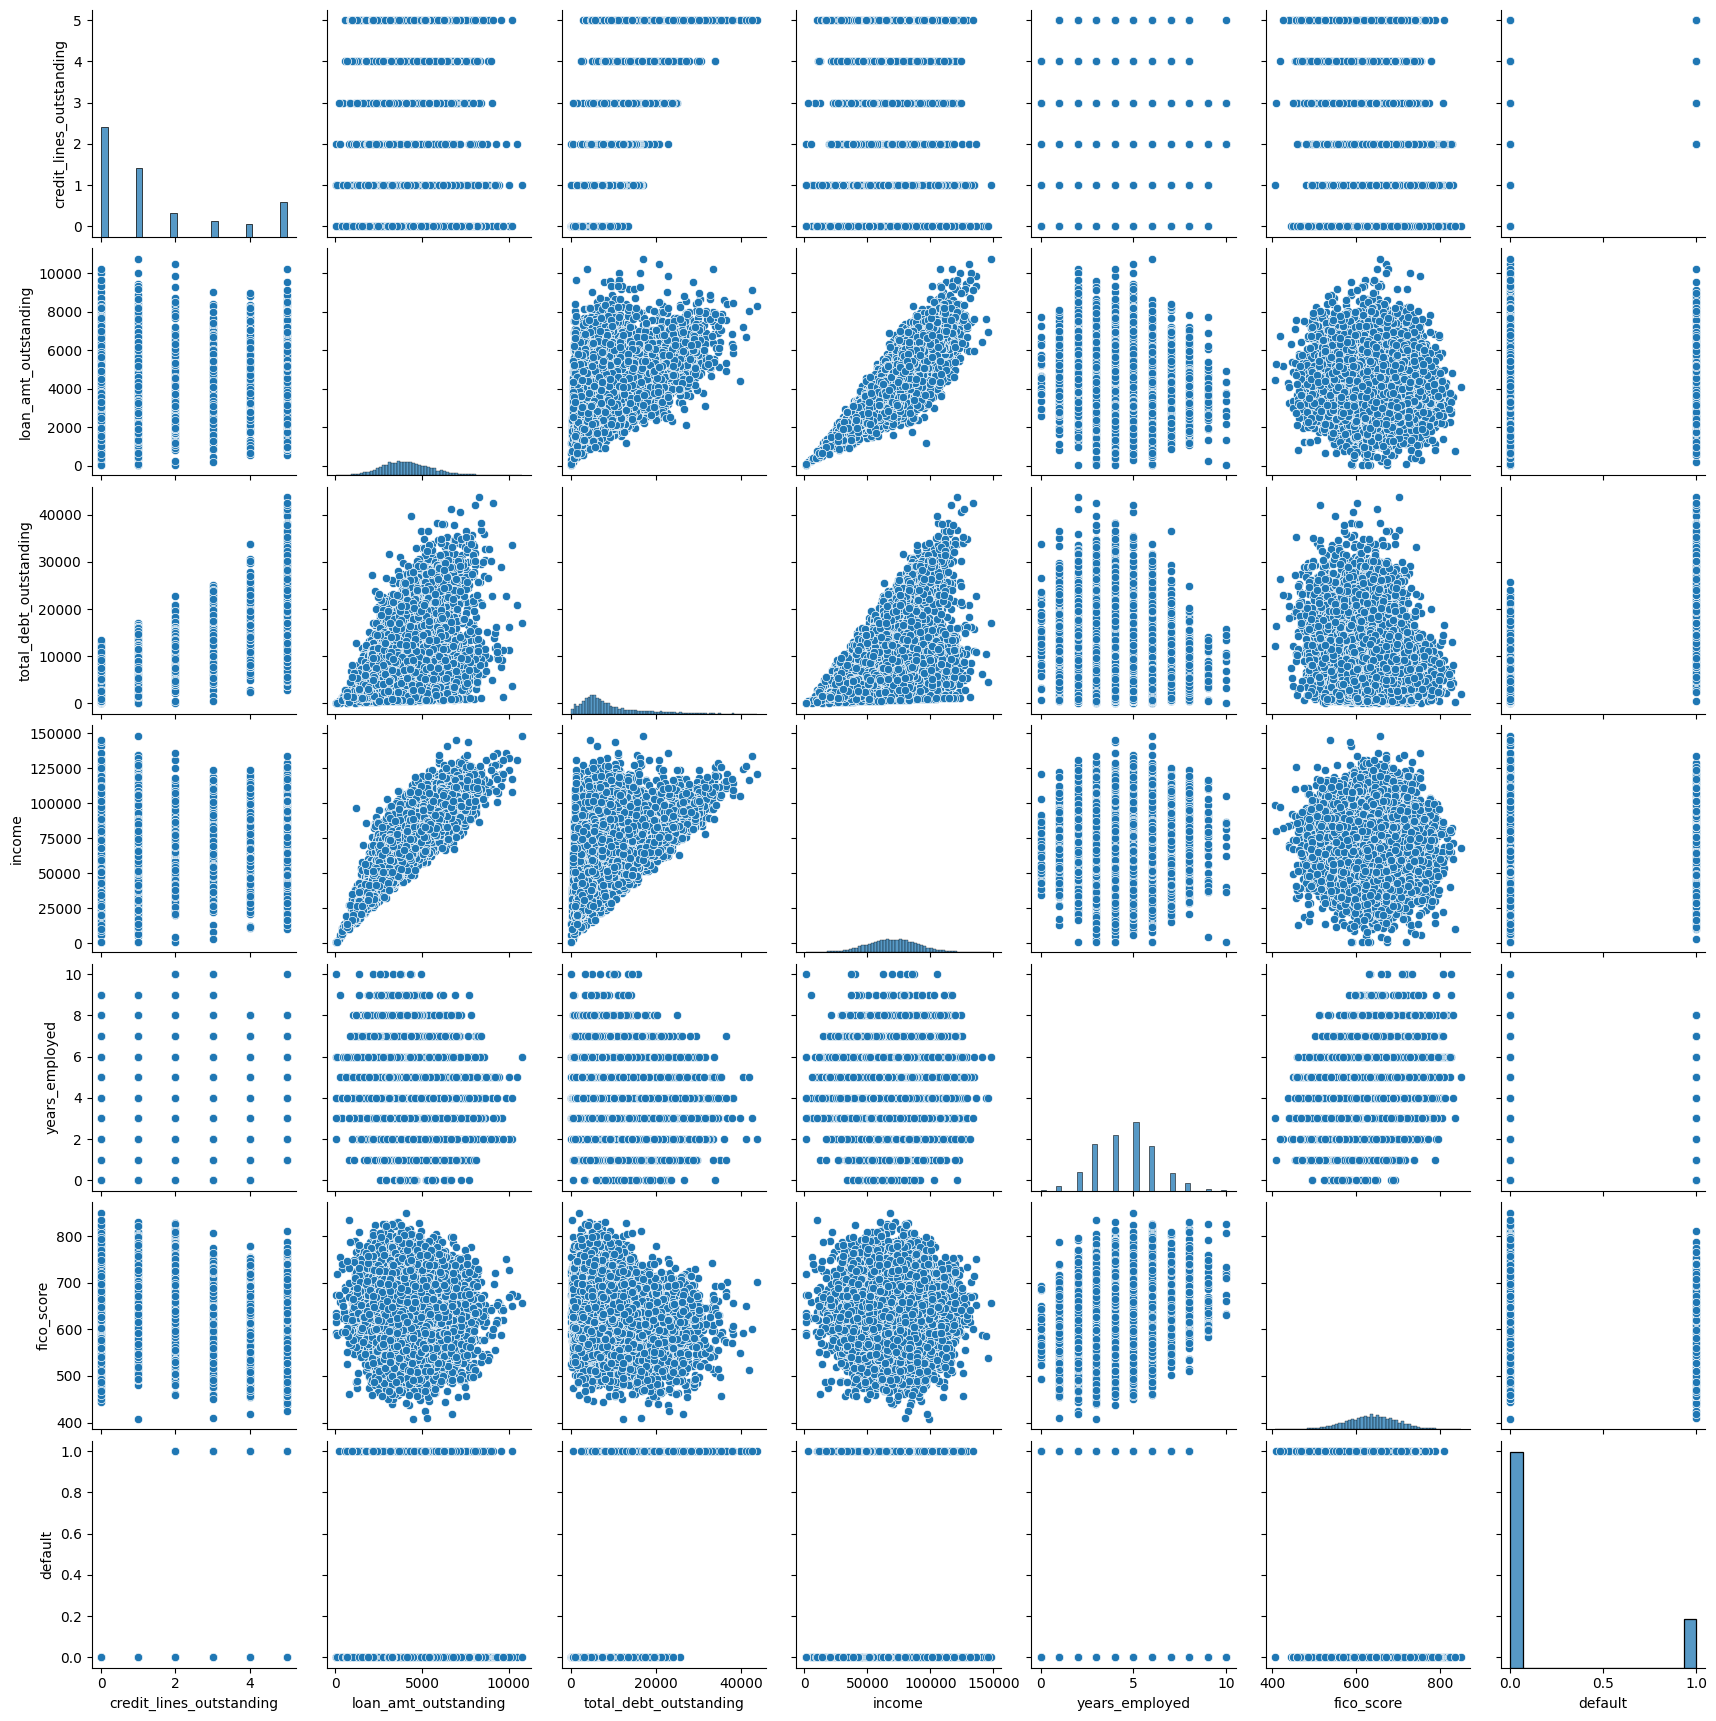

In [6]:
sns.pairplot(data.drop('customer_id', axis=1))

## Logistic regression

In [7]:
data = sm.add_constant(data)
X = data.drop(['customer_id','default'],axis=1)
Y = data['default']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify = Y)

In [8]:
est = sm.Logit(Y_train,X_train)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.001691
         Iterations 20
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6700
Model:                          Logit   Df Residuals:                     6693
Method:                           MLE   Df Model:                            6
Date:                Mon, 03 Jul 2023   Pseudo R-squ.:                  0.9965
Time:                        17:04:43   Log-Likelihood:                -11.328
converged:                       True   LL-Null:                       -3209.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       68.1840     23.282      2.929      0.003      22.55

In [9]:
# Check performance of model on test dataset
confusion_matrix(Y_test, est2.predict(X_test).round(0))
accuracy_score(Y_test, est2.predict(X_test).round(0))

0.9990909090909091

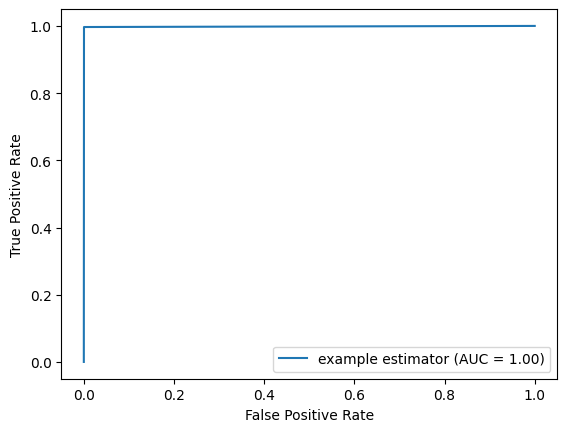

In [10]:
fpr, tpr, thresholds = roc_curve(Y_test, est2.predict(X_test).round(0))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## Function

In [11]:
def expected_loss(df):
  probability = est2.predict(df).round(6)
  loss = df[['loan_amt_outstanding','total_debt_outstanding']].sum(axis=1) * 0.1
  return(probability*loss)


In [12]:
expected_loss(X_test)

3705      0.000
9011   2882.650
1242   4159.619
5699      0.000
8651   4473.392
         ...   
4557      0.000
1224      0.000
4151      0.000
4987   3890.595
6927   2347.189
Length: 3300, dtype: float64